import pandas!

In [36]:
import pandas as pd

Load all the dataframes

In [37]:
suppliers = pd.read_csv("https://www.dropbox.com/s/jjbacrux6bc1b4s/suppliers.csv?dl=1")
demand = pd.read_csv("https://www.dropbox.com/s/0yikq3pugq87vl9/demand_forecasts.csv?dl=1")
recipes = pd.read_csv("https://www.dropbox.com/s/az97voeh6i8x3i2/recipes.csv?dl=1")

In [38]:
suppliers

supp_id ingredient_uuid  cost_per_unit unit_name country_of_origin  \
0   megacorp           cocoa         2500.0     tonne             ghana   
1   megacorp     milk_powder         3200.0     tonne            france   
2   megacorp        hazelnut         1918.0     tonne            turkey   
3   megacorp           sugar          457.0     tonne            brazil   
4   megacorp         vanilla          237.0     tonne             china   
5   omni_inc           cocoa         2400.0     tonne     cote d'ivoire   
6   omni_inc     milk_powder         3120.0     tonne       switzerland   
7   omni_inc        hazelnut         1925.0     tonne             italy   
8   omni_inc           sugar          465.0     tonne             india   
9   omni_inc         vanilla          201.0     tonne         indonesia   
10  acme_inc           cocoa         2370.0     tonne         indonesia   
11  acme_inc     milk_powder         3190.0     tonne           denmark   
12  acme_inc        hazelnut         1817.0     tonne               usa   
13  acme_inc           sugar          476.0     tonne             china   
14  acme_inc         vanilla          185.0     tonne        madagascar   

    total_tax_per_unit  time_to_deliver  
0                   14               12  
1                   12                3  
2                   12                4  
3                    5                9  
4                    3               10  
5                   14               12  
6                    0                2  
7                   12                3  
8                    5               12  
9                    3               12  
10                  14               12  
11                  12                3  
12                  12                8  
13                   5               10  
14                   3               12

In [39]:
demand

rec_id month  demand
0        1   jan   16443
1        1   feb   18943
2        1   mar   19727
3        1   apr   10368
4        1   may   15125
5        1   jun   18413
6        1   jul   17442
7        1   aug   19986
8        1   sep   15302
9        1   oct   13637
10       1   nov   16877
11       1   dec   15290
12       2   jan   14779
13       2   feb   14568
14       2   mar   11552
15       2   apr   10552
16       2   may   13765
17       2   jun   14758
18       2   jul   11285
19       2   aug   10799
20       2   sep   13370
21       2   oct   13686
22       2   nov   11628
23       2   dec   11724
24       3   jan   12356
25       3   feb   14191
26       3   mar   10613
27       3   apr   10261
28       3   may   10111
29       3   jun   16552
30       3   jul   12428
31       3   aug   19101
32       3   sep   10577
33       3   oct   10309
34       3   nov   15003
35       3   dec   13065

In [40]:
recipes

rec_id ingredient_uuid  cost_to_process  time_to_process  qty
0        1           cocoa             0.20              120   13
1        1     milk_powder             0.03              110   12
2        1        hazelnut             0.08               45    4
3        1           sugar             0.40               80    5
4        2         vanilla             0.10               34    3
5        2           cocoa             0.20              120   12
6        2     milk_powder             0.03              110   11
7        2           sugar             0.40               80    4
8        3        hazelnut             0.08               45    3
9        3         vanilla             0.10               34    2
10       3           cocoa             0.20              120   12
11       3     milk_powder             0.03               11   12
12       3           sugar             0.40               80    4

Choose suppliers for each ingredient for each product.
Select the cheapest option, and the least tax option, and the fastest option.


In [41]:
cheapest_supplier = suppliers.loc[suppliers.groupby('ingredient_uuid')['cost_per_unit'].idxmin()]
cheapest_supplier

supp_id ingredient_uuid  cost_per_unit unit_name country_of_origin  \
10  acme_inc           cocoa         2370.0     tonne         indonesia   
12  acme_inc        hazelnut         1817.0     tonne               usa   
6   omni_inc     milk_powder         3120.0     tonne       switzerland   
3   megacorp           sugar          457.0     tonne            brazil   
14  acme_inc         vanilla          185.0     tonne        madagascar   

    total_tax_per_unit  time_to_deliver  
10                  14               12  
12                  12                8  
6                    0                2  
3                    5                9  
14                   3               12

In [42]:
q = cheapest_supplier.merge( recipes, on="ingredient_uuid" )
q['tax2'] = q['total_tax_per_unit']*q['qty']
q.groupby('rec_id')['tax2'].sum()*1000

rec_id
1    255000
2    197000
3    230000
Name: tax2, dtype: int64

In [43]:
suppliers.loc[suppliers.groupby('ingredient_uuid')['total_tax_per_unit'].idxmin()]

supp_id ingredient_uuid  cost_per_unit unit_name country_of_origin  \
0  megacorp           cocoa         2500.0     tonne             ghana   
2  megacorp        hazelnut         1918.0     tonne            turkey   
6  omni_inc     milk_powder         3120.0     tonne       switzerland   
3  megacorp           sugar          457.0     tonne            brazil   
4  megacorp         vanilla          237.0     tonne             china   

   total_tax_per_unit  time_to_deliver  
0                  14               12  
2                  12                4  
6                   0                2  
3                   5                9  
4                   3               10

In [44]:
suppliers.loc[suppliers.groupby('ingredient_uuid')['time_to_deliver'].idxmin()]

supp_id ingredient_uuid  cost_per_unit unit_name country_of_origin  \
0  megacorp           cocoa         2500.0     tonne             ghana   
7  omni_inc        hazelnut         1925.0     tonne             italy   
6  omni_inc     milk_powder         3120.0     tonne       switzerland   
3  megacorp           sugar          457.0     tonne            brazil   
4  megacorp         vanilla          237.0     tonne             china   

   total_tax_per_unit  time_to_deliver  
0                  14               12  
7                  12                3  
6                   0                2  
3                   5                9  
4                   3               10

Work out total demand for each ingredient, using the demand for each product by month, and over a year.

In [45]:
ingredient_demand = demand.merge(recipes, on='rec_id')
ingredient_demand['ingredient_demand'] = ingredient_demand['demand']*ingredient_demand['qty']
ingredient_demand

rec_id month  demand ingredient_uuid  cost_to_process  time_to_process  \
0         1   jan   16443           cocoa             0.20              120   
1         1   jan   16443     milk_powder             0.03              110   
2         1   jan   16443        hazelnut             0.08               45   
3         1   jan   16443           sugar             0.40               80   
4         1   feb   18943           cocoa             0.20              120   
..      ...   ...     ...             ...              ...              ...   
151       3   dec   13065        hazelnut             0.08               45   
152       3   dec   13065         vanilla             0.10               34   
153       3   dec   13065           cocoa             0.20              120   
154       3   dec   13065     milk_powder             0.03               11   
155       3   dec   13065           sugar             0.40               80   

     qty  ingredient_demand  
0     13             213759  
1     12             197316  
2      4              65772  
3      5              82215  
4     13             246259  
..   ...                ...  
151    3              39195  
152    2              26130  
153   12             156780  
154   12             156780  
155    4              52260  

[156 rows x 8 columns]

In [46]:
monthly_ingredient_demand = ingredient_demand.groupby(['ingredient_uuid','month'])[['ingredient_demand']].sum()
monthly_ingredient_demand

ingredient_demand
ingredient_uuid month                   
cocoa           apr               384540
                aug               618618
                dec               496238
                feb               591367
                jan               539379
                jul               511302
                jun               615089
                mar               522431
                may               483137
                nov               538973
                oct               465221
                sep               486290
hazelnut        apr                72255
                aug               137247
                dec               100355
                feb               118345
                jan               102840
                jul               107052
                jun               123308
                mar               110747
                may                90833
                nov               112517
                oct                85475
                sep                92939
milk_powder     apr               363620
                aug               587833
                dec               469224
                feb               557856
                jan               508157
                jul               482575
                jun               581918
                mar               491152
                may               454247
                nov               510468
                oct               437898
                sep               457618
sugar           apr               135092
                aug               219530
                dec               175606
                feb               209751
                jan               190755
                jul               182062
                jun               217305
                mar               187295
                may               171129
                nov               190909
                oct               164165
                sep               172298
vanilla         apr                52178
                aug                70599
                dec                61302
                feb                72086
                jan                69049
                jul                58711
                jun                77378
                mar                55882
                may                61517
                nov                64890
                oct                61676
                sep                61264

ingredient_uuid
cocoa          AxesSubplot(0.125,0.125;0.775x0.755)
hazelnut       AxesSubplot(0.125,0.125;0.775x0.755)
milk_powder    AxesSubplot(0.125,0.125;0.775x0.755)
sugar          AxesSubplot(0.125,0.125;0.775x0.755)
vanilla        AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

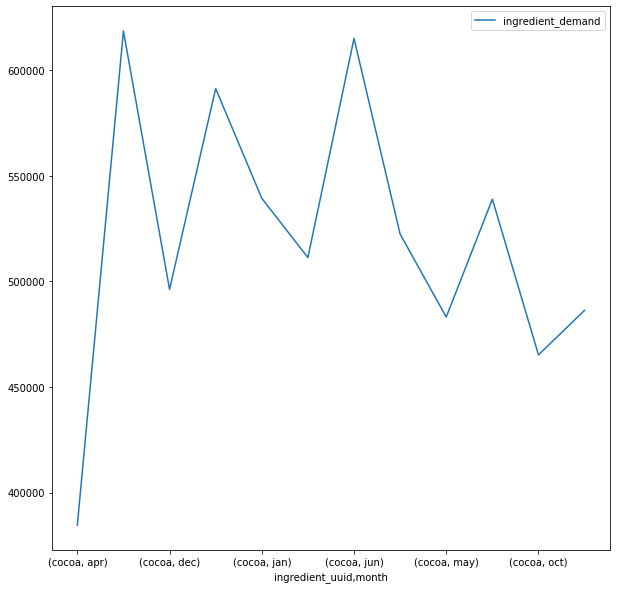

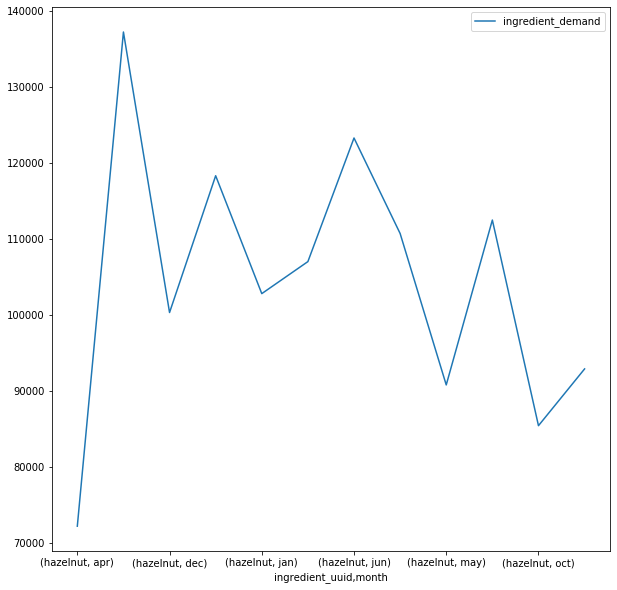

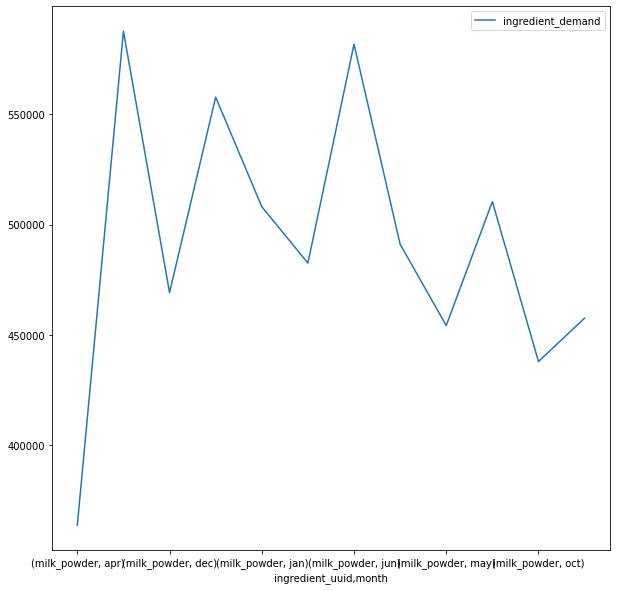

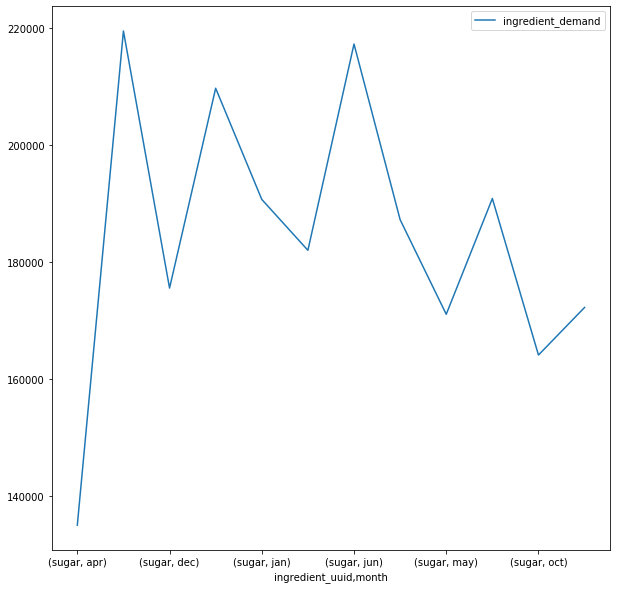

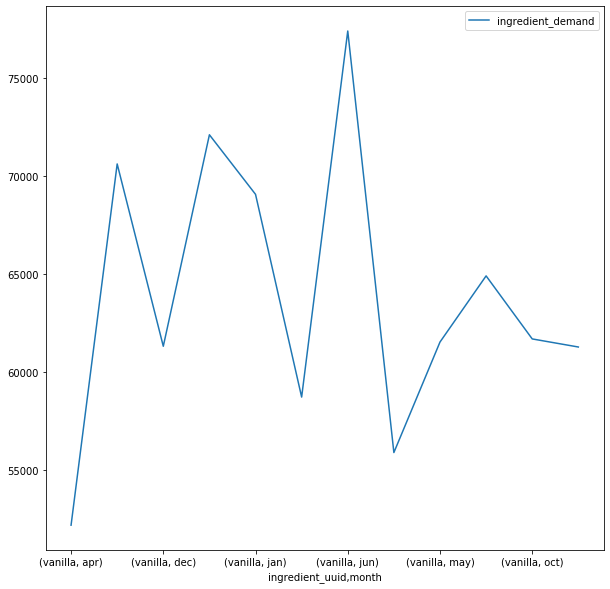

In [47]:
monthly_ingredient_demand.groupby('ingredient_uuid').plot(figsize=(10,10))

In [48]:
ingredient_demand.merge(cheapest_supplier, on='ingredient_uuid')
ingredient_demand['ingredient_demand'] = ingredient_demand['demand']*ingredient_demand['qty']
ingredient_demand

rec_id month  demand ingredient_uuid  cost_to_process  time_to_process  \
0         1   jan   16443           cocoa             0.20              120   
1         1   jan   16443     milk_powder             0.03              110   
2         1   jan   16443        hazelnut             0.08               45   
3         1   jan   16443           sugar             0.40               80   
4         1   feb   18943           cocoa             0.20              120   
..      ...   ...     ...             ...              ...              ...   
151       3   dec   13065        hazelnut             0.08               45   
152       3   dec   13065         vanilla             0.10               34   
153       3   dec   13065           cocoa             0.20              120   
154       3   dec   13065     milk_powder             0.03               11   
155       3   dec   13065           sugar             0.40               80   

     qty  ingredient_demand  
0     13             213759  
1     12             197316  
2      4              65772  
3      5              82215  
4     13             246259  
..   ...                ...  
151    3              39195  
152    2              26130  
153   12             156780  
154   12             156780  
155    4              52260  

[156 rows x 8 columns]

In [49]:
demand_by_supply = ingredient_demand.merge(cheapest_supplier, on='ingredient_uuid')
demand_by_supply['ingredient_cost'] = demand_by_supply['ingredient_demand']*demand_by_supply['cost_per_unit']
demand_by_supply

rec_id month  demand ingredient_uuid  cost_to_process  time_to_process  \
0         1   jan   16443           cocoa              0.2              120   
1         1   feb   18943           cocoa              0.2              120   
2         1   mar   19727           cocoa              0.2              120   
3         1   apr   10368           cocoa              0.2              120   
4         1   may   15125           cocoa              0.2              120   
..      ...   ...     ...             ...              ...              ...   
151       3   aug   19101         vanilla              0.1               34   
152       3   sep   10577         vanilla              0.1               34   
153       3   oct   10309         vanilla              0.1               34   
154       3   nov   15003         vanilla              0.1               34   
155       3   dec   13065         vanilla              0.1               34   

     qty  ingredient_demand   supp_id  cost_per_unit unit_name  \
0     13             213759  acme_inc         2370.0     tonne   
1     13             246259  acme_inc         2370.0     tonne   
2     13             256451  acme_inc         2370.0     tonne   
3     13             134784  acme_inc         2370.0     tonne   
4     13             196625  acme_inc         2370.0     tonne   
..   ...                ...       ...            ...       ...   
151    2              38202  acme_inc          185.0     tonne   
152    2              21154  acme_inc          185.0     tonne   
153    2              20618  acme_inc          185.0     tonne   
154    2              30006  acme_inc          185.0     tonne   
155    2              26130  acme_inc          185.0     tonne   

    country_of_origin  total_tax_per_unit  time_to_deliver  ingredient_cost  
0           indonesia                  14               12      506608830.0  
1           indonesia                  14               12      583633830.0  
2           indonesia                  14               12      607788870.0  
3           indonesia                  14               12      319438080.0  
4           indonesia                  14               12      466001250.0  
..                ...                 ...              ...              ...  
151        madagascar                   3               12        7067370.0  
152        madagascar                   3               12        3913490.0  
153        madagascar                   3               12        3814330.0  
154        madagascar                   3               12        5551110.0  
155        madagascar                   3               12        4834050.0  

[156 rows x 15 columns]

Work out total cost per unit to product


In [50]:
demand_by_supply.groupby('rec_id')['ingredient_cost'].sum()

rec_id
1    1.537022e+10
2    9.932093e+09
3    1.136516e+10
Name: ingredient_cost, dtype: float64

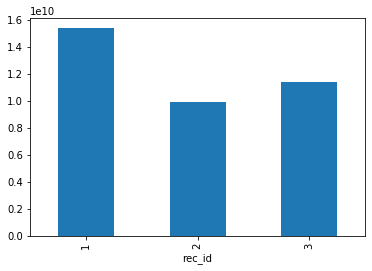

In [51]:
demand_by_supply.groupby('rec_id')['ingredient_cost'].sum().plot.bar()

(Homework) work out how to find the total cost of goods needed for each producer country.


In [52]:
ingredient_demand.merge(cheapest_supplier, on="ingredient_uuid").groupby('country_of_origin').sum()

rec_id  demand  cost_to_process  time_to_process  qty  \
country_of_origin                                                          
brazil                 72  504586            14.40             2880  156   
indonesia              72  504586             7.20             4320  444   
madagascar             60  307033             2.40              816   60   
switzerland            72  504586             1.08             2772  420   
usa                    48  352120             1.92             1080   84   

                   ingredient_demand  cost_per_unit  total_tax_per_unit  \
country_of_origin                                                         
brazil                       2215897        16452.0                 180   
indonesia                    6252585        85320.0                 504   
madagascar                    766532         4440.0                  72   
switzerland                  5902566       112320.0                   0   
usa                          1253913        43608.0                 288   

                   time_to_deliver  
country_of_origin                   
brazil                         324  
indonesia                      432  
madagascar                     288  
switzerland                     72  
usa                            192

(Homework) work out how to find the total tax, using the cheapest supplier for each ingredient, to create 1000 of each recipe.

In [53]:
q = ingredient_demand.merge(cheapest_supplier, on="ingredient_uuid").groupby('ingredient_uuid').sum()
q[['total_tax_per_unit']]

total_tax_per_unit
ingredient_uuid                    
cocoa                           504
hazelnut                        288
milk_powder                       0
sugar                           180
vanilla                          72

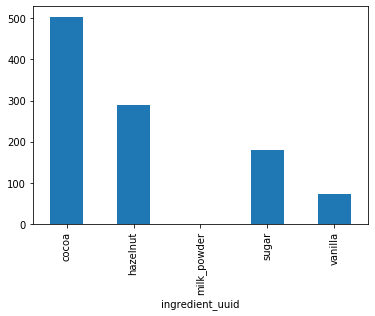

In [54]:
q['total_tax_per_unit'].plot.bar(x = "ingredient_uuid", y="total_tax_per_unit")

In [55]:
q['total_cost'] = q['ingredient_demand']*q['cost_per_unit'] + q['ingredient_demand']*q['total_tax_per_unit']
q

rec_id  demand  cost_to_process  time_to_process  qty  \
ingredient_uuid                                                          
cocoa                72  504586             7.20             4320  444   
hazelnut             48  352120             1.92             1080   84   
milk_powder          72  504586             1.08             2772  420   
sugar                72  504586            14.40             2880  156   
vanilla              60  307033             2.40              816   60   

                 ingredient_demand  cost_per_unit  total_tax_per_unit  \
ingredient_uuid                                                         
cocoa                      6252585        85320.0                 504   
hazelnut                   1253913        43608.0                 288   
milk_powder                5902566       112320.0                   0   
sugar                      2215897        16452.0                 180   
vanilla                     766532         4440.0                  72   

                 time_to_deliver    total_cost  
ingredient_uuid                                 
cocoa                        432  5.366219e+11  
hazelnut                     192  5.504177e+10  
milk_powder                   72  6.629762e+11  
sugar                        324  3.685480e+10  
vanilla                      288  3.458592e+09

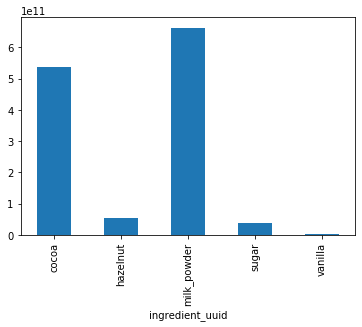

In [56]:
q['total_cost'].plot.bar()

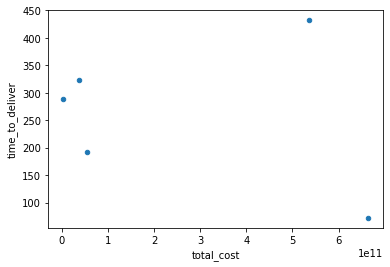

In [57]:
q[['total_cost', 'time_to_deliver']].plot.scatter(x='total_cost', y='time_to_deliver')

In [58]:
q = ingredient_demand.merge(cheapest_supplier, on="ingredient_uuid").groupby('ingredient_uuid')[['total_tax_per_unit']].sum()
q

total_tax_per_unit
ingredient_uuid                    
cocoa                           504
hazelnut                        288
milk_powder                       0
sugar                           180
vanilla                          72

In [59]:
#forecasting

In [60]:
from random import randint
import numpy as np

In [61]:
recipes = pd.read_csv("https://www.dropbox.com/s/az97voeh6i8x3i2/demand_trend.csv?dl=1")
recipes

rec_id ingredient_uuid  cost_to_process  time_to_process  qty
0        1           cocoa             0.20              120   13
1        1     milk_powder             0.03              110   12
2        1        hazelnut             0.08               45    4
3        1           sugar             0.40               80    5
4        2         vanilla             0.10               34    3
5        2           cocoa             0.20              120   12
6        2     milk_powder             0.03              110   11
7        2           sugar             0.40               80    4
8        3        hazelnut             0.08               45    3
9        3         vanilla             0.10               34    2
10       3           cocoa             0.20              120   12
11       3     milk_powder             0.03               11   12
12       3           sugar             0.40               80    4

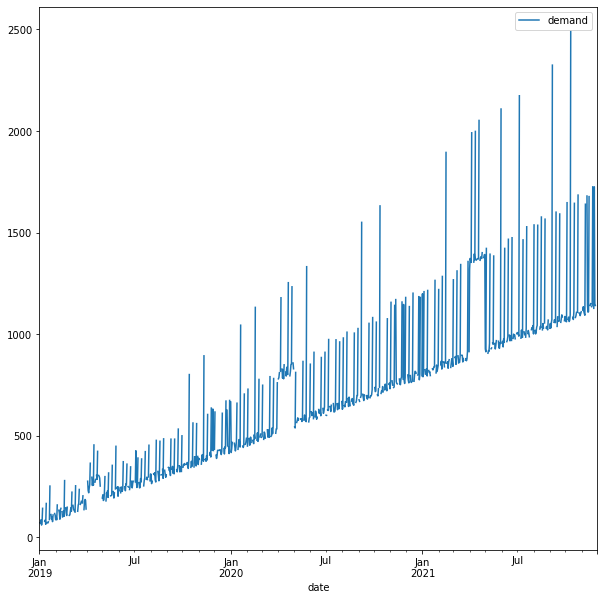

In [63]:
df = pd.read_csv("/home/benjamin/Desktop/day 5/data/demand_trend.csv", index_col=0)

df['date'] = pd.to_datetime(df['date'])
q = df[ ['date', 'demand'] ]
q.plot(x='date', y='demand', figsize=(10,10))

In [64]:
q

date  demand
0    2019-01-01     NaN
1    2019-01-02    71.0
2    2019-01-03    70.0
3    2019-01-04    86.0
4    2019-01-05    60.0
...         ...     ...
1061 2021-11-27  1141.0
1062 2021-11-28     NaN
1063 2021-11-29  1738.5
1064 2021-11-30     NaN
1065 2021-12-01  1156.0

[1066 rows x 2 columns]

In [65]:
q.dropna()

date  demand
1    2019-01-02    71.0
2    2019-01-03    70.0
3    2019-01-04    86.0
4    2019-01-05    60.0
5    2019-01-06    74.0
...         ...     ...
1059 2021-11-25  1725.0
1060 2021-11-26  1150.0
1061 2021-11-27  1141.0
1063 2021-11-29  1738.5
1065 2021-12-01  1156.0

[811 rows x 2 columns]

In [66]:
df.fillna( df['demand'].mean() )

date       demand
0    2019-01-01   696.522811
1    2019-01-02    71.000000
2    2019-01-03    70.000000
3    2019-01-04    86.000000
4    2019-01-05    60.000000
...         ...          ...
1061 2021-11-27  1141.000000
1062 2021-11-28   696.522811
1063 2021-11-29  1738.500000
1064 2021-11-30   696.522811
1065 2021-12-01  1156.000000

[1066 rows x 2 columns]

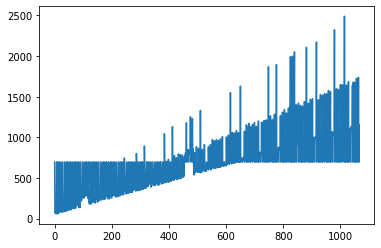

In [67]:
df.fillna( df['demand'].mean() )['demand'].plot()

In [68]:
df.fillna( method='ffill' )

date  demand
0    2019-01-01     NaN
1    2019-01-02    71.0
2    2019-01-03    70.0
3    2019-01-04    86.0
4    2019-01-05    60.0
...         ...     ...
1061 2021-11-27  1141.0
1062 2021-11-28  1141.0
1063 2021-11-29  1738.5
1064 2021-11-30  1738.5
1065 2021-12-01  1156.0

[1066 rows x 2 columns]

In [69]:
df.fillna( method='bfill' )

date  demand
0    2019-01-01    71.0
1    2019-01-02    71.0
2    2019-01-03    70.0
3    2019-01-04    86.0
4    2019-01-05    60.0
...         ...     ...
1061 2021-11-27  1141.0
1062 2021-11-28  1738.5
1063 2021-11-29  1738.5
1064 2021-11-30  1156.0
1065 2021-12-01  1156.0

[1066 rows x 2 columns]

In [70]:
df.fillna( method='ffill' ).fillna( method='bfill' )

date  demand
0    2019-01-01    71.0
1    2019-01-02    71.0
2    2019-01-03    70.0
3    2019-01-04    86.0
4    2019-01-05    60.0
...         ...     ...
1061 2021-11-27  1141.0
1062 2021-11-28  1141.0
1063 2021-11-29  1738.5
1064 2021-11-30  1738.5
1065 2021-12-01  1156.0

[1066 rows x 2 columns]

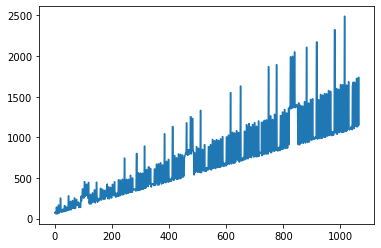

In [71]:
df.fillna( method='ffill' ).fillna( method='bfill' )['demand'].plot()

In [72]:
df['day_of_year'] = df['date'].apply( lambda x : x.dayofyear )

df['week_of_year'] = df['date'].apply( lambda x : x.weekofyear )

df['day_of_week'] = df['date'].apply( lambda x : x.day_of_week )

df['is_month_start'] = df['date'].apply( lambda x : x.is_month_start )

df['month'] = df['date'].apply( lambda x : x.month )

In [73]:
df

date  demand  day_of_year  week_of_year  day_of_week  \
0    2019-01-01     NaN            1             1            1   
1    2019-01-02    71.0            2             1            2   
2    2019-01-03    70.0            3             1            3   
3    2019-01-04    86.0            4             1            4   
4    2019-01-05    60.0            5             1            5   
...         ...     ...          ...           ...          ...   
1061 2021-11-27  1141.0          331            47            5   
1062 2021-11-28     NaN          332            47            6   
1063 2021-11-29  1738.5          333            48            0   
1064 2021-11-30     NaN          334            48            1   
1065 2021-12-01  1156.0          335            48            2   

      is_month_start  month  
0               True      1  
1              False      1  
2              False      1  
3              False      1  
4              False      1  
...              ...    ...  
1061           False     11  
1062           False     11  
1063           False     11  
1064           False     11  
1065            True     12  

[1066 rows x 7 columns]

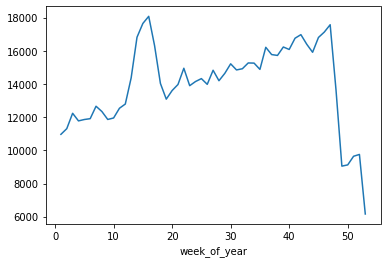

In [74]:
df.fillna(df['demand'].mean()).groupby( 'week_of_year' )['demand'].sum().plot()

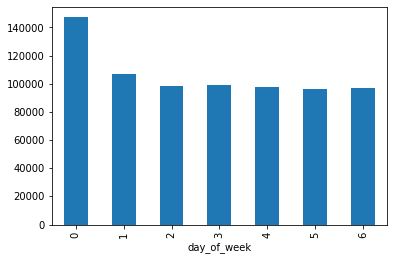

In [75]:
df.fillna(df['demand'].mean()).groupby( 'day_of_week' )['demand'].sum().plot.bar()

In [76]:
#homework : create a bar chart grouping all the data by month. Is any one month significantly higher than the others

In [77]:
#homework (research needed) : use diff + shift functions to work out rate of demand growth month/month and year / year
#take care to notice what happens with nan

In [78]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [79]:
cal = calendar()
holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())

df['holiday'] = df['date'].isin(holidays)

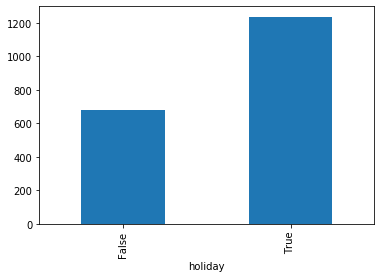

In [80]:
df.groupby('holiday')['demand'].mean().plot.bar()

In [81]:
df['diff_day'] = df.fillna( method='ffill' ).fillna( method='bfill' )['demand'].diff(periods=1)
df

date  demand  day_of_year  week_of_year  day_of_week  \
0    2019-01-01     NaN            1             1            1   
1    2019-01-02    71.0            2             1            2   
2    2019-01-03    70.0            3             1            3   
3    2019-01-04    86.0            4             1            4   
4    2019-01-05    60.0            5             1            5   
...         ...     ...          ...           ...          ...   
1061 2021-11-27  1141.0          331            47            5   
1062 2021-11-28     NaN          332            47            6   
1063 2021-11-29  1738.5          333            48            0   
1064 2021-11-30     NaN          334            48            1   
1065 2021-12-01  1156.0          335            48            2   

      is_month_start  month  holiday  diff_day  
0               True      1     True       NaN  
1              False      1    False       0.0  
2              False      1    False      -1.0  
3              False      1    False      16.0  
4              False      1    False     -26.0  
...              ...    ...      ...       ...  
1061           False     11    False      -9.0  
1062           False     11    False       0.0  
1063           False     11    False     597.5  
1064           False     11    False       0.0  
1065            True     12    False    -582.5  

[1066 rows x 9 columns]

In [82]:
df.fillna( method='ffill' ).fillna( method='bfill' )['demand'].diff(periods=10)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
1061      0.0
1062     -9.0
1063    588.5
1064    603.5
1065     15.0
Name: demand, Length: 1066, dtype: float64

In [83]:
df

date  demand  day_of_year  week_of_year  day_of_week  \
0    2019-01-01     NaN            1             1            1   
1    2019-01-02    71.0            2             1            2   
2    2019-01-03    70.0            3             1            3   
3    2019-01-04    86.0            4             1            4   
4    2019-01-05    60.0            5             1            5   
...         ...     ...          ...           ...          ...   
1061 2021-11-27  1141.0          331            47            5   
1062 2021-11-28     NaN          332            47            6   
1063 2021-11-29  1738.5          333            48            0   
1064 2021-11-30     NaN          334            48            1   
1065 2021-12-01  1156.0          335            48            2   

      is_month_start  month  holiday  diff_day  
0               True      1     True       NaN  
1              False      1    False       0.0  
2              False      1    False      -1.0  
3              False      1    False      16.0  
4              False      1    False     -26.0  
...              ...    ...      ...       ...  
1061           False     11    False      -9.0  
1062           False     11    False       0.0  
1063           False     11    False     597.5  
1064           False     11    False       0.0  
1065            True     12    False    -582.5  

[1066 rows x 9 columns]

In [84]:
df['demand_shift'] = df['demand'].shift(2)
df

date  demand  day_of_year  week_of_year  day_of_week  \
0    2019-01-01     NaN            1             1            1   
1    2019-01-02    71.0            2             1            2   
2    2019-01-03    70.0            3             1            3   
3    2019-01-04    86.0            4             1            4   
4    2019-01-05    60.0            5             1            5   
...         ...     ...          ...           ...          ...   
1061 2021-11-27  1141.0          331            47            5   
1062 2021-11-28     NaN          332            47            6   
1063 2021-11-29  1738.5          333            48            0   
1064 2021-11-30     NaN          334            48            1   
1065 2021-12-01  1156.0          335            48            2   

      is_month_start  month  holiday  diff_day  demand_shift  
0               True      1     True       NaN           NaN  
1              False      1    False       0.0           NaN  
2              False      1    False      -1.0           NaN  
3              False      1    False      16.0          71.0  
4              False      1    False     -26.0          70.0  
...              ...    ...      ...       ...           ...  
1061           False     11    False      -9.0        1725.0  
1062           False     11    False       0.0        1150.0  
1063           False     11    False     597.5        1141.0  
1064           False     11    False       0.0           NaN  
1065            True     12    False    -582.5        1738.5  

[1066 rows x 10 columns]

In [85]:
df['dod_demand'] = df['demand'] / df['demand_shift']
df

date  demand  day_of_year  week_of_year  day_of_week  \
0    2019-01-01     NaN            1             1            1   
1    2019-01-02    71.0            2             1            2   
2    2019-01-03    70.0            3             1            3   
3    2019-01-04    86.0            4             1            4   
4    2019-01-05    60.0            5             1            5   
...         ...     ...          ...           ...          ...   
1061 2021-11-27  1141.0          331            47            5   
1062 2021-11-28     NaN          332            47            6   
1063 2021-11-29  1738.5          333            48            0   
1064 2021-11-30     NaN          334            48            1   
1065 2021-12-01  1156.0          335            48            2   

      is_month_start  month  holiday  diff_day  demand_shift  dod_demand  
0               True      1     True       NaN           NaN         NaN  
1              False      1    False       0.0           NaN         NaN  
2              False      1    False      -1.0           NaN         NaN  
3              False      1    False      16.0          71.0    1.211268  
4              False      1    False     -26.0          70.0    0.857143  
...              ...    ...      ...       ...           ...         ...  
1061           False     11    False      -9.0        1725.0    0.661449  
1062           False     11    False       0.0        1150.0         NaN  
1063           False     11    False     597.5        1141.0    1.523663  
1064           False     11    False       0.0           NaN         NaN  
1065            True     12    False    -582.5        1738.5    0.664941  

[1066 rows x 11 columns]

In [86]:
#using the index
df

date  demand  day_of_year  week_of_year  day_of_week  \
0    2019-01-01     NaN            1             1            1   
1    2019-01-02    71.0            2             1            2   
2    2019-01-03    70.0            3             1            3   
3    2019-01-04    86.0            4             1            4   
4    2019-01-05    60.0            5             1            5   
...         ...     ...          ...           ...          ...   
1061 2021-11-27  1141.0          331            47            5   
1062 2021-11-28     NaN          332            47            6   
1063 2021-11-29  1738.5          333            48            0   
1064 2021-11-30     NaN          334            48            1   
1065 2021-12-01  1156.0          335            48            2   

      is_month_start  month  holiday  diff_day  demand_shift  dod_demand  
0               True      1     True       NaN           NaN         NaN  
1              False      1    False       0.0           NaN         NaN  
2              False      1    False      -1.0           NaN         NaN  
3              False      1    False      16.0          71.0    1.211268  
4              False      1    False     -26.0          70.0    0.857143  
...              ...    ...      ...       ...           ...         ...  
1061           False     11    False      -9.0        1725.0    0.661449  
1062           False     11    False       0.0        1150.0         NaN  
1063           False     11    False     597.5        1141.0    1.523663  
1064           False     11    False       0.0           NaN         NaN  
1065            True     12    False    -582.5        1738.5    0.664941  

[1066 rows x 11 columns]

In [87]:
%%time
df[df['date'] == pd.Timestamp("2020-01-01")]

CPU times: user 2.93 ms, sys: 0 ns, total: 2.93 ms
Wall time: 2.64 ms


date  demand  day_of_year  week_of_year  day_of_week  \
365 2020-01-01   666.0            1             1            2   

     is_month_start  month  holiday  diff_day  demand_shift  dod_demand  
365            True      1     True      -7.5         673.5    0.988864

In [88]:
df2 = df.set_index("date")

In [89]:
df2

demand  day_of_year  week_of_year  day_of_week  is_month_start  \
date                                                                         
2019-01-01     NaN            1             1            1            True   
2019-01-02    71.0            2             1            2           False   
2019-01-03    70.0            3             1            3           False   
2019-01-04    86.0            4             1            4           False   
2019-01-05    60.0            5             1            5           False   
...            ...          ...           ...          ...             ...   
2021-11-27  1141.0          331            47            5           False   
2021-11-28     NaN          332            47            6           False   
2021-11-29  1738.5          333            48            0           False   
2021-11-30     NaN          334            48            1           False   
2021-12-01  1156.0          335            48            2            True   

            month  holiday  diff_day  demand_shift  dod_demand  
date                                                            
2019-01-01      1     True       NaN           NaN         NaN  
2019-01-02      1    False       0.0           NaN         NaN  
2019-01-03      1    False      -1.0           NaN         NaN  
2019-01-04      1    False      16.0          71.0    1.211268  
2019-01-05      1    False     -26.0          70.0    0.857143  
...           ...      ...       ...           ...         ...  
2021-11-27     11    False      -9.0        1725.0    0.661449  
2021-11-28     11    False       0.0        1150.0         NaN  
2021-11-29     11    False     597.5        1141.0    1.523663  
2021-11-30     11    False       0.0           NaN         NaN  
2021-12-01     12    False    -582.5        1738.5    0.664941  

[1066 rows x 10 columns]

In [90]:
%%time
df2[df2.index == pd.Timestamp("2020-01-01")]

CPU times: user 1.32 ms, sys: 251 µs, total: 1.57 ms
Wall time: 1.4 ms


demand  day_of_year  week_of_year  day_of_week  is_month_start  \
date                                                                         
2020-01-01   666.0            1             1            2            True   

            month  holiday  diff_day  demand_shift  dod_demand  
date                                                            
2020-01-01      1     True      -7.5         673.5    0.988864

In [91]:
dr = pd.date_range(start="01-01-1700", end="01-01-2200", freq="h")
df3 = pd.DataFrame(np.random.randn(len(dr), 1), columns=['mycol'])
df3['date'] = dr

In [92]:
df3

mycol                date
0       -0.543518 1700-01-01 00:00:00
1       -0.513547 1700-01-01 01:00:00
2       -0.302799 1700-01-01 02:00:00
3        0.331178 1700-01-01 03:00:00
4       -0.575039 1700-01-01 04:00:00
...           ...                 ...
4382900  1.289994 2199-12-31 20:00:00
4382901 -0.018799 2199-12-31 21:00:00
4382902  1.698098 2199-12-31 22:00:00
4382903 -0.184648 2199-12-31 23:00:00
4382904  0.641898 2200-01-01 00:00:00

[4382905 rows x 2 columns]

In [93]:
%%time
df3[df3['date'] == pd.Timestamp("2020-01-01")]

CPU times: user 21.9 ms, sys: 7.66 ms, total: 29.6 ms
Wall time: 28.5 ms


mycol       date
2805048 -0.878842 2020-01-01

In [94]:
df4 = df3.set_index('date')
df4

mycol
date                         
1700-01-01 00:00:00 -0.543518
1700-01-01 01:00:00 -0.513547
1700-01-01 02:00:00 -0.302799
1700-01-01 03:00:00  0.331178
1700-01-01 04:00:00 -0.575039
...                       ...
2199-12-31 20:00:00  1.289994
2199-12-31 21:00:00 -0.018799
2199-12-31 22:00:00  1.698098
2199-12-31 23:00:00 -0.184648
2200-01-01 00:00:00  0.641898

[4382905 rows x 1 columns]

In [95]:
%%time
df4[df4.index == pd.Timestamp("2020-01-01")]

CPU times: user 16.3 ms, sys: 769 µs, total: 17 ms
Wall time: 15.2 ms


mycol
date                
2020-01-01 -0.878842

In [96]:
%%time
df4.loc[pd.Timestamp("2020-01-01")]

CPU times: user 11.5 ms, sys: 641 µs, total: 12.2 ms
Wall time: 10.6 ms


mycol   -0.878842
Name: 2020-01-01 00:00:00, dtype: float64

In [97]:
df5 = suppliers.set_index(['ingredient_uuid', 'supp_id'])

In [98]:
df5

cost_per_unit unit_name country_of_origin  \
ingredient_uuid supp_id                                               
cocoa           megacorp         2500.0     tonne             ghana   
milk_powder     megacorp         3200.0     tonne            france   
hazelnut        megacorp         1918.0     tonne            turkey   
sugar           megacorp          457.0     tonne            brazil   
vanilla         megacorp          237.0     tonne             china   
cocoa           omni_inc         2400.0     tonne     cote d'ivoire   
milk_powder     omni_inc         3120.0     tonne       switzerland   
hazelnut        omni_inc         1925.0     tonne             italy   
sugar           omni_inc          465.0     tonne             india   
vanilla         omni_inc          201.0     tonne         indonesia   
cocoa           acme_inc         2370.0     tonne         indonesia   
milk_powder     acme_inc         3190.0     tonne           denmark   
hazelnut        acme_inc         1817.0     tonne               usa   
sugar           acme_inc          476.0     tonne             china   
vanilla         acme_inc          185.0     tonne        madagascar   

                          total_tax_per_unit  time_to_deliver  
ingredient_uuid supp_id                                        
cocoa           megacorp                  14               12  
milk_powder     megacorp                  12                3  
hazelnut        megacorp                  12                4  
sugar           megacorp                   5                9  
vanilla         megacorp                   3               10  
cocoa           omni_inc                  14               12  
milk_powder     omni_inc                   0                2  
hazelnut        omni_inc                  12                3  
sugar           omni_inc                   5               12  
vanilla         omni_inc                   3               12  
cocoa           acme_inc                  14               12  
milk_powder     acme_inc                  12                3  
hazelnut        acme_inc                  12                8  
sugar           acme_inc                   5               10  
vanilla         acme_inc                   3               12

In [99]:
%%time
df5[ df5.index == ('vanilla','megacorp') ]

CPU times: user 0 ns, sys: 1.62 ms, total: 1.62 ms
Wall time: 1.53 ms


cost_per_unit unit_name country_of_origin  \
ingredient_uuid supp_id                                               
vanilla         megacorp          237.0     tonne             china   

                          total_tax_per_unit  time_to_deliver  
ingredient_uuid supp_id                                        
vanilla         megacorp                   3               10

In [100]:
%%time
df5.loc[ ('vanilla','megacorp') ]

CPU times: user 1.11 ms, sys: 0 ns, total: 1.11 ms
Wall time: 1.1 ms


cost_per_unit         237.0
unit_name             tonne
country_of_origin     china
total_tax_per_unit        3
time_to_deliver          10
Name: (vanilla, megacorp), dtype: object

In [101]:
df5.xs("vanilla", level="ingredient_uuid")

cost_per_unit unit_name country_of_origin  total_tax_per_unit  \
supp_id                                                                   
megacorp          237.0     tonne             china                   3   
omni_inc          201.0     tonne         indonesia                   3   
acme_inc          185.0     tonne        madagascar                   3   

          time_to_deliver  
supp_id                    
megacorp               10  
omni_inc               12  
acme_inc               12

In [102]:
df5.xs("acme_inc", level="supp_id")

cost_per_unit unit_name country_of_origin  \
ingredient_uuid                                              
cocoa                   2370.0     tonne         indonesia   
milk_powder             3190.0     tonne           denmark   
hazelnut                1817.0     tonne               usa   
sugar                    476.0     tonne             china   
vanilla                  185.0     tonne        madagascar   

                 total_tax_per_unit  time_to_deliver  
ingredient_uuid                                       
cocoa                            14               12  
milk_powder                      12                3  
hazelnut                         12                8  
sugar                             5               10  
vanilla                           3               12

In [103]:
df5.xs("acme_inc", level="supp_id")

cost_per_unit unit_name country_of_origin  \
ingredient_uuid                                              
cocoa                   2370.0     tonne         indonesia   
milk_powder             3190.0     tonne           denmark   
hazelnut                1817.0     tonne               usa   
sugar                    476.0     tonne             china   
vanilla                  185.0     tonne        madagascar   

                 total_tax_per_unit  time_to_deliver  
ingredient_uuid                                       
cocoa                            14               12  
milk_powder                      12                3  
hazelnut                         12                8  
sugar                             5               10  
vanilla                           3               12

In [104]:
#this is the "real deal"
#select no slice (so everything) for index col one, then one value from index col two. ", :" means, select all cols

df5.loc[(slice(None), "omni_inc"), : ]

cost_per_unit unit_name country_of_origin  \
ingredient_uuid supp_id                                               
cocoa           omni_inc         2400.0     tonne     cote d'ivoire   
milk_powder     omni_inc         3120.0     tonne       switzerland   
hazelnut        omni_inc         1925.0     tonne             italy   
sugar           omni_inc          465.0     tonne             india   
vanilla         omni_inc          201.0     tonne         indonesia   

                          total_tax_per_unit  time_to_deliver  
ingredient_uuid supp_id                                        
cocoa           omni_inc                  14               12  
milk_powder     omni_inc                   0                2  
hazelnut        omni_inc                  12                3  
sugar           omni_inc                   5               12  
vanilla         omni_inc                   3               12

In [105]:
df5.loc[(slice(None), "omni_inc"), "unit_name"]

ingredient_uuid  supp_id 
cocoa            omni_inc    tonne
milk_powder      omni_inc    tonne
hazelnut         omni_inc    tonne
sugar            omni_inc    tonne
vanilla          omni_inc    tonne
Name: unit_name, dtype: object

In [106]:
df5.loc[(slice(None), "omni_inc"), ["unit_name", "cost_per_unit"] ]

unit_name  cost_per_unit
ingredient_uuid supp_id                          
cocoa           omni_inc     tonne         2400.0
milk_powder     omni_inc     tonne         3120.0
hazelnut        omni_inc     tonne         1925.0
sugar           omni_inc     tonne          465.0
vanilla         omni_inc     tonne          201.0

In [107]:
#as a last resort, cos it loses the speed-up of the index. Just don't.
df5[df5.index.get_level_values(1) == "omni_inc"]

cost_per_unit unit_name country_of_origin  \
ingredient_uuid supp_id                                               
cocoa           omni_inc         2400.0     tonne     cote d'ivoire   
milk_powder     omni_inc         3120.0     tonne       switzerland   
hazelnut        omni_inc         1925.0     tonne             italy   
sugar           omni_inc          465.0     tonne             india   
vanilla         omni_inc          201.0     tonne         indonesia   

                          total_tax_per_unit  time_to_deliver  
ingredient_uuid supp_id                                        
cocoa           omni_inc                  14               12  
milk_powder     omni_inc                   0                2  
hazelnut        omni_inc                  12                3  
sugar           omni_inc                   5               12  
vanilla         omni_inc                   3               12

In [108]:
idemand = demand.set_index('rec_id')
irecipes = recipes.set_index('rec_id')

#only possible in most recent versions of pandas ;) so take care with that one
iingredient_demand = idemand.merge(irecipes, on='rec_id')


In [109]:
iingredient_demand

month  demand ingredient_uuid  cost_to_process  time_to_process  qty
rec_id                                                                     
1        jan   16443           cocoa             0.20              120   13
1        jan   16443     milk_powder             0.03              110   12
1        jan   16443        hazelnut             0.08               45    4
1        jan   16443           sugar             0.40               80    5
1        feb   18943           cocoa             0.20              120   13
...      ...     ...             ...              ...              ...  ...
3        dec   13065        hazelnut             0.08               45    3
3        dec   13065         vanilla             0.10               34    2
3        dec   13065           cocoa             0.20              120   12
3        dec   13065     milk_powder             0.03               11   12
3        dec   13065           sugar             0.40               80    4

[156 rows x 6 columns]

In [110]:
iingredient_demand = idemand.merge(irecipes, left_index=True, right_index=True)


In [111]:
iingredient_demand

month  demand ingredient_uuid  cost_to_process  time_to_process  qty
rec_id                                                                     
1        jan   16443           cocoa             0.20              120   13
1        jan   16443     milk_powder             0.03              110   12
1        jan   16443        hazelnut             0.08               45    4
1        jan   16443           sugar             0.40               80    5
1        feb   18943           cocoa             0.20              120   13
...      ...     ...             ...              ...              ...  ...
3        dec   13065        hazelnut             0.08               45    3
3        dec   13065         vanilla             0.10               34    2
3        dec   13065           cocoa             0.20              120   12
3        dec   13065     milk_powder             0.03               11   12
3        dec   13065           sugar             0.40               80    4

[156 rows x 6 columns]

In [112]:
#going hardcore
idx = pd.IndexSlice
df5.loc[ idx[ ['milk_powder', 'hazelnut'], : ] ]

cost_per_unit unit_name country_of_origin  \
ingredient_uuid supp_id                                               
milk_powder     megacorp         3200.0     tonne            france   
                omni_inc         3120.0     tonne       switzerland   
                acme_inc         3190.0     tonne           denmark   
hazelnut        megacorp         1918.0     tonne            turkey   
                omni_inc         1925.0     tonne             italy   
                acme_inc         1817.0     tonne               usa   

                          total_tax_per_unit  time_to_deliver  
ingredient_uuid supp_id                                        
milk_powder     megacorp                  12                3  
                omni_inc                   0                2  
                acme_inc                  12                3  
hazelnut        megacorp                  12                4  
                omni_inc                  12                3  
                acme_inc                  12                8

In [113]:
df6 = df5.reset_index().set_index( ['ingredient_uuid', 'cost_per_unit'] ) #needed first unfortunately

idx = pd.IndexSlice
df6.loc[ idx[ ['milk_powder', 'hazelnut'], : ] ]

supp_id unit_name country_of_origin  \
ingredient_uuid cost_per_unit                                         
milk_powder     3200.0         megacorp     tonne            france   
                3120.0         omni_inc     tonne       switzerland   
                3190.0         acme_inc     tonne           denmark   
hazelnut        1918.0         megacorp     tonne            turkey   
                1925.0         omni_inc     tonne             italy   
                1817.0         acme_inc     tonne               usa   

                               total_tax_per_unit  time_to_deliver  
ingredient_uuid cost_per_unit                                       
milk_powder     3200.0                         12                3  
                3120.0                          0                2  
                3190.0                         12                3  
hazelnut        1918.0                         12                4  
                1925.0                         12                3  
                1817.0                         12                8

In [114]:
df6=df6.sort_index()

In [115]:
i = idx[ :, slice(2500, 4000) , : ]
df6.loc[ i ]

supp_id unit_name country_of_origin  \
ingredient_uuid cost_per_unit                                         
cocoa           2500.0         megacorp     tonne             ghana   
milk_powder     3120.0         omni_inc     tonne       switzerland   
                3190.0         acme_inc     tonne           denmark   
                3200.0         megacorp     tonne            france   

                               total_tax_per_unit  time_to_deliver  
ingredient_uuid cost_per_unit                                       
cocoa           2500.0                         14               12  
milk_powder     3120.0                          0                2  
                3190.0                         12                3  
                3200.0                         12                3

In [116]:
#or in one step once you master it
#this is the best solution for most complex cases
#the final ":" selects a set of cols in a similar way

df6.loc[ idx[ :, slice(2500, 4000) , : ] ]

supp_id unit_name country_of_origin  \
ingredient_uuid cost_per_unit                                         
cocoa           2500.0         megacorp     tonne             ghana   
milk_powder     3120.0         omni_inc     tonne       switzerland   
                3190.0         acme_inc     tonne           denmark   
                3200.0         megacorp     tonne            france   

                               total_tax_per_unit  time_to_deliver  
ingredient_uuid cost_per_unit                                       
cocoa           2500.0                         14               12  
milk_powder     3120.0                          0                2  
                3190.0                         12                3  
                3200.0                         12                3